In [1]:
!pwd
!python --version
!which python

/home/shpaik/22-acml2022/Fig1
Python 3.6.10 :: Anaconda, Inc.
/home/shpaik/anaconda3/envs/py36/bin/python


In [2]:
import os
current_dir = os.getcwd()
current_dir

'/home/shpaik/22-acml2022/Fig1'

In [3]:
data_list = ["run_synth_nonstationary", "run_synth_stationary"]

selected_models=["SemiRGraphTS", "IndividualSemiRidgeGraphThompson", "SemiTS_Single", "GraphUCBlocal", "SCLUB", "DyClu", "LinTS", "LinTS_Single", "Random"]
time_horizon = 50000
start = 100 # ignore round 1 to "start"

In [4]:
import numpy as np 
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.sparse import csgraph 
import scipy
import os
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time
from datetime import datetime

In [5]:
plt.style.use("ggplot")

[]

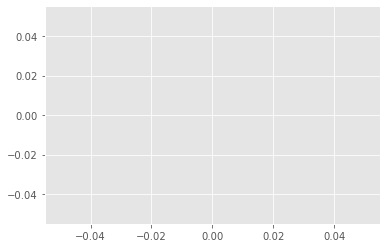

In [6]:
plt.figure()
plt.plot()

In [7]:
# file name
first = "./" # + data 
second = "/results/regret_saving_folder/regret/cumulated_regret_"
third = "_gamma_5.npy"

In [8]:
regrets_dict = {DATA:{} for DATA in data_list}
regrets_dict_lower = {DATA:{} for DATA in data_list}
regrets_dict_upper = {DATA:{} for DATA in data_list}

colors_dict = {"Random": "gold",
               "RGraphTS" : "r",
               "LinTS" : "g",
               "SemiRGraphTS" : "blue",
               "GraphUCBlocal" : "brown",
               "CLUB" : "slategrey",
               "SCLUB" : "r",
               "DyClu" : "aqua",
               "IndividualSemiRidgeGraphThompson" : "pink",
               "LinTS_Single" : "lime",
               "SemiTS_Single": "m"}

labels_dict = {"Random": "Random",
               "RGraphTS" : "Proposed-Stationary",
               "LinTS" : "LinTS-Ind",
               "SemiRGraphTS" : "Proposed",
               "GraphUCBlocal" : "GraphUCB",
               "CLUB" : "CLUB",
               "SCLUB" : "SCLUB",
               "DyClu" : "DyClu",
               "IndividualSemiRidgeGraphThompson" : "SemiTS-Ind",
               "LinTS_Single" : "LinTS-Sin",
               "SemiTS_Single": "SemiTS-Sin"}

In [9]:
for DATA in data_list:
    regrets_dict[DATA] = {}
    regrets_dict_lower[DATA] = {}
    regrets_dict_upper[DATA] = {}
    for MODEL in selected_models:
        file = np.load(first + DATA + second +  MODEL + third)
        regrets_dict[DATA][MODEL] = np.mean(file, axis=0)[start:]
        regrets_dict_lower[DATA][MODEL] = regrets_dict[DATA][MODEL] - 1.96 * np.std(file, axis=0)[start:] / np.sqrt(5)
        regrets_dict_upper[DATA][MODEL] = regrets_dict[DATA][MODEL] + 1.96 * np.std(file, axis=0)[start:] / np.sqrt(5)        
#         regrets_dict[DATA][MODEL] = np.median(file, axis=0)[start:]
#         regrets_dict_lower[DATA][MODEL] = np.percentile(file, 25, axis=0)[start:]
#         regrets_dict_upper[DATA][MODEL] = np.percentile(file, 75, axis=0)[start:]

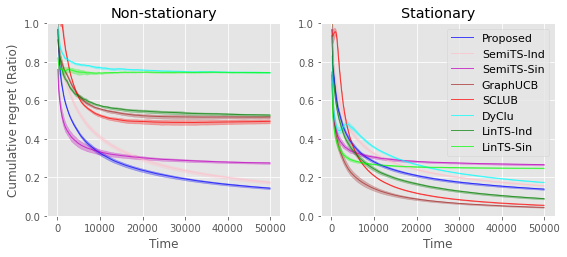

In [10]:
SAVE = True # False

steps=np.arange(start+1,time_horizon+1)
mask = np.arange(0, time_horizon-start, 200) # to reduce the file size
sparse_steps = [steps[i] for i in mask]

fig, axs = plt.subplots(1, len(data_list), figsize=(len(data_list) * 4, 4))

for idx, DATA in enumerate(data_list):
    denominator = regrets_dict[DATA]["Random"]
    for MODEL in selected_models:
        if MODEL in ["Random"]:
            continue
        LABEL = labels_dict[MODEL]
        
        y = regrets_dict[DATA][MODEL] / denominator
        y_lower = regrets_dict_lower[DATA][MODEL] / denominator
        y_upper = regrets_dict_upper[DATA][MODEL] / denominator
        
        sparse_y = [y[i] for i in mask]
        sparse_y_lower = [y_lower[i] for i in mask]
        sparse_y_upper = [y_upper[i] for i in mask]
        
        axs[idx].plot(sparse_steps, sparse_y, color = colors_dict[MODEL], linewidth = 1, alpha = 0.7, label = LABEL)
        axs[idx].fill_between(sparse_steps, sparse_y_lower, sparse_y_upper, color = colors_dict[MODEL], alpha=0.3)
        
    if DATA == "run_synth_nonstationary":
        axs[idx].set_title("Non-stationary")
        axs[idx].set(xlabel = "Time", ylabel = "Cumulative regret (Ratio)")
    if DATA == "run_synth_stationary":
        axs[idx].set_title("Stationary")
        axs[idx].set(xlabel = "Time")
    
    axs[idx].set_ylim([0, 1])
    
    if idx == 1:
        axs[idx].legend(fontsize = 11)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

if SAVE == True:
    IMG_PATH = "Fig1.pdf"
    plt.savefig(IMG_PATH, bbox_inches='tight')

fig.show()